In [2]:
from copy import deepcopy
import h5py
import matplotlib.pyplot as plt
import numpy as np

## Load the dataset in `hdf5`

In [3]:
with h5py.File("mitbih_train.hdf5", 'r') as hdf:
    x_train = hdf['x_train'][:]
    x_train = np.squeeze(x_train)
    y_train = hdf['y_train'][:]
    binary_y_train = deepcopy(y_train)
    binary_y_train[binary_y_train > 0] = 1
    # np.savetxt("csv/mitbih_x_train.csv", x_train, delimiter=",")
    # np.savetxt("csv/mitbih_binary_y_train.csv", binary_y_train, delimiter=",")

In [3]:
print(f"{x_train.shape = }")
print(f"{y_train.shape = }")
print(f"{np.max(x_train) = }")
print(f"{np.min(x_train) = }")

x_train.shape = (13245, 128)
y_train.shape = (13245,)
np.max(x_train) = 1.0025882857391737
np.min(x_train) = -0.003320392437785869


In [4]:
with h5py.File("mitbih_test.hdf5", 'r') as hdf:
    x_test = hdf['x_test'][:]
    x_test = np.squeeze(x_test)
    y_test = hdf['y_test'][:]
    binary_y_test = deepcopy(y_test)
    binary_y_test[binary_y_test > 0] = 1
    # np.savetxt("csv/mitbih_x_test.csv", x, delimiter=",")
    # np.savetxt("csv/mitbih_binary_y_test.csv", binary_y, delimiter=",")

In [5]:
print(f"{x_test.shape = }")
print(f"{y_test.shape = }")
print(f"{np.max(x_test) = }")
print(f"{np.min(x_test) = }")

x_test.shape = (13245, 128)
y_test.shape = (13245,)
np.max(x_test) = 0.9952500164218069
np.min(x_test) = -0.011433581701107389


Let's investigate the number of examples in each class

In [8]:
np.unique(binary_y_train, return_counts=True)

(array([0, 1]), array([ 3000, 10245]))

In [9]:
np.unique(binary_y_test, return_counts=True)

(array([0, 1]), array([ 3000, 10245]))

We can see that we have `3000 (~20%)` examples for the `0` class and `10245 (~80%)`  examples for the `1` class

## Make the dataset balanced

### under-sampling the `1` class

`Train` split

In [6]:
ones_indices = np.where(binary_y_train == 1)[0]
print(ones_indices)
to_be_removed = np.random.choice(ones_indices, size=7245, replace=False)
print(f"{len(to_be_removed) = }")

[    0     1     2 ... 13241 13242 13243]
len(to_be_removed) = 7245


In [16]:
balanced_x_train = np.delete(x_train, to_be_removed, 0)
balanced_bin_y_train = np.delete(binary_y_train, to_be_removed, 0)

In [17]:
print(f"{balanced_x_train.shape = }")
print(f"{balanced_bin_y_train.shape = }")

balanced_x_train.shape = (6000, 128)
balanced_bin_y_train.shape = (6000,)


`Test` split

In [18]:
ones_indices_test = np.where(binary_y_test == 1)[0]
print(ones_indices_test)
to_be_removed_test = np.random.choice(ones_indices_test, size=7245, replace=False)
print(f"{len(to_be_removed_test) = }")

[    0     1     4 ... 13242 13243 13244]
len(to_be_removed_test) = 7245


In [19]:
balanced_x_test = np.delete(x_test, to_be_removed_test, 0)
balanced_bin_y_test = np.delete(binary_y_test, to_be_removed_test, 0)

In [21]:
print(f"{balanced_x_test.shape = }")
print(f"{balanced_bin_y_test.shape = }")

balanced_x_test.shape = (6000, 128)
balanced_bin_y_test.shape = (6000,)


Save the balanced data into `.csv`

In [22]:
np.savetxt("csv/mitbih_balanced_x_train.csv", balanced_x_train, delimiter=",")
np.savetxt("csv/mitbih_balanced_x_test.csv", balanced_x_test, delimiter=",")
np.savetxt("csv/mitbih_balanced_bin_y_train.csv", balanced_bin_y_train, delimiter=",")
np.savetxt("csv/mitbih_balanced_bin_y_test.csv", balanced_bin_y_test, delimiter=",")

## Scale the data into 4-bit integers

The unbalanced dataset

In [11]:
x_train_int = (x_train * 2**4).astype(np.int8)

In [62]:
print(f"{np.max(x_train_int) = }")
print(f"{np.min(x_train_int) = }")

np.max(x_train_int) = 16
np.min(x_train_int) = 0


In [12]:
x_test_int = (x_test * 2**4).astype(np.int8)

In [65]:
print(f"{np.max(x_test_int) = }")
print(f"{np.min(x_test_int) = }")

np.max(x_test_int) = 15
np.min(x_test_int) = 0


In [66]:
np.savetxt("csv/mitbih_x_train_int.csv", x_train_int, delimiter=",")
np.savetxt("csv/mitbih_x_test_int.csv", x_test_int, delimiter=",")

The balanced dataset

In [7]:
import numpy as np
balanced_x_train_float = np.genfromtxt("csv/mitbih_balanced_x_train.csv", delimiter=',')
balanced_x_train_int = (balanced_x_train_float * 2**4).astype(np.int8)

(6000, 128)

In [9]:
np.savetxt("csv/mitbih_balanced_x_train_int.csv", balanced_x_train_int, delimiter=",")

In [10]:
balanced_x_test_float = np.genfromtxt("csv/mitbih_balanced_x_test.csv", delimiter=',')
balanced_x_test_int = (balanced_x_test_float * 2**4).astype(np.int8)
np.savetxt("csv/mitbih_balanced_x_test_int.csv", balanced_x_test_int, delimiter=",")

## Plot the `int` and `float` data

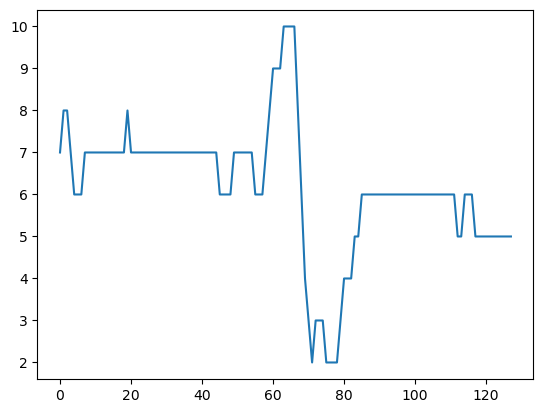

In [16]:
plt.plot(balanced_x_train_int[0])

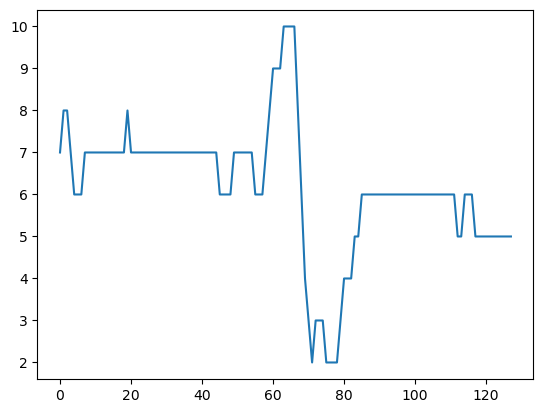

In [13]:
plt.plot(x_train_int[0])

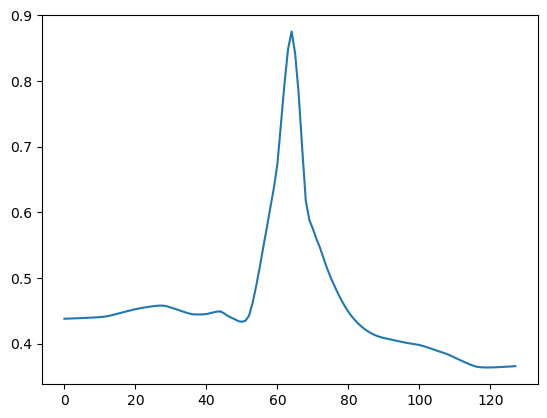

In [14]:
plt.plot(x_test[0])

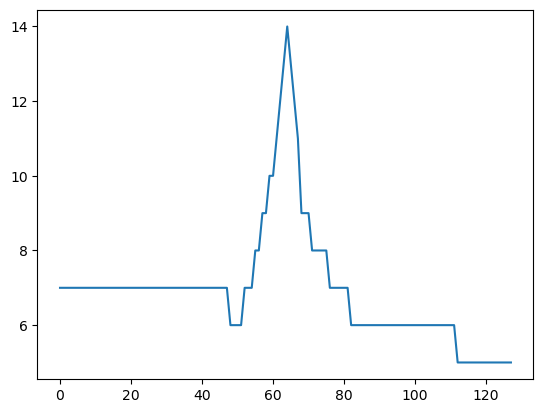

In [15]:
plt.plot(x_test_int[0])